[GBR x and y]
mse:  2339.8574031881317
rmse:  48.37207255419321
mae:  35.524826449705785
r2:  0.5402574235268429


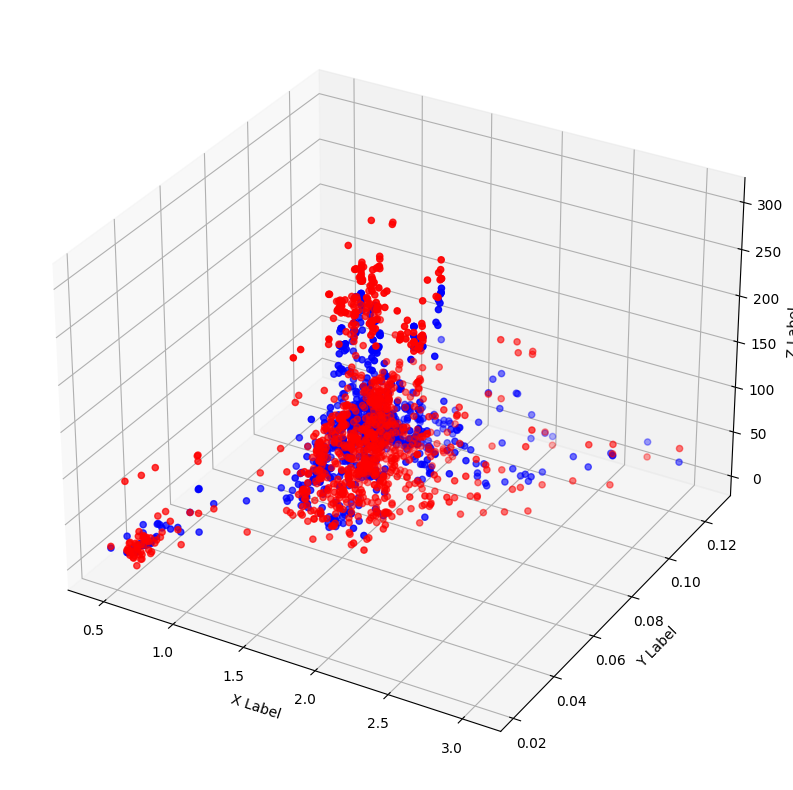

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def evaluate_regression(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, rmse, mae, r2

path = '/home/ghosnp/dataset/self_l1/all_data.csv'
df = pd.read_csv(path)
X_train = np.array([df['x'],df['y']]).T
y_train = np.array(df['z'])

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.2)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
gbr_mse, gbr_rmse, gbr_mae, gbr_r2 = evaluate_regression(y_test, y_pred)
print('[GBR x and y]')
print('mse: ', gbr_mse)
print('rmse: ', gbr_rmse)
print('mae: ', gbr_mae)
print('r2: ', gbr_r2)

# vis the test data and curve in 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test, c='r', marker='o')
ax.scatter(X_test[:,0], X_test[:,1], y_pred, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


